# 7-6. 프로젝트: 고양이 수염 스티커 만들기
오늘 배운 내용을 이용해서 여러분 만의 스티커를 만들고 적용해보겠습니다.

주요 라이브러리 버전을 확인해 보고 시작하죠!



In [1]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


## Step 1. 스티커 구하기 or 만들기
스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

In [2]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


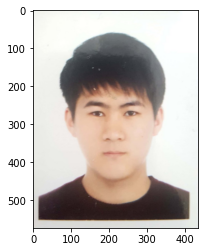

In [3]:
# 이미지 경로
my_image_path = 'aiffel/camera_sticker/images/JMK.png' 

# 이미지 불러오기
img_bgr = cv2.imread(my_image_path)    

# 출력용 이미지를 따로 보관
img_show = img_bgr.copy()      
img_show_2 = img_bgr.copy()

# BGR -> RGB로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) 
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [4]:
# detector
detector_hog = dlib.get_frontal_face_detector()

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (이미지, 이미지 피라미드)

rectangles[[(92, 217) (315, 440)]]


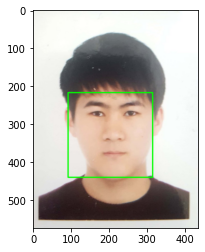

In [6]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 사각형의 왼쪽 위 좌표와 오른쪽 아래 좌표로 그림
    
# 사각형의 크기는 224 x 224
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

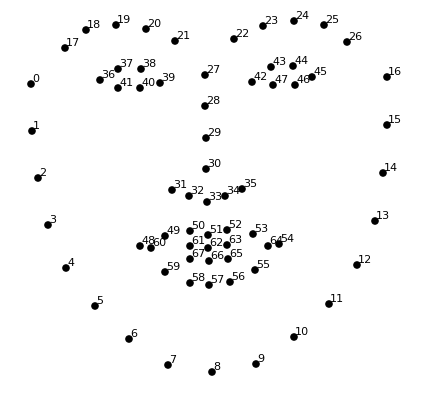

코 끝인 33 번보다 좋은 위치가 있을 거예요.



In [7]:
model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [8]:
# 랜드마크의 위치를 저장할 리스트
list_landmarks = [] 

# face landmark 찾아서 저장
for dlib_rect in dlib_rects:
    
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장    
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    
    # list_landmarks에 랜드마크 리스트를 저장(68개)    
    list_landmarks.append(list_points)
        

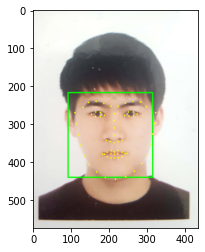

In [9]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

# RGB 이미지로 전환            
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# 이미지를 준비
plt.imshow(img_show_rgb)

# 이미지를 출력
plt.show()


## Step 4. 스티커 적용하기
### (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.
- 고양이 수염의 크기를 과하게 변경할 경우 이상한 형태의 스티커가 나오며 이를 피하기 위해서 스티커의 크기를 위에서 구한 사각형의 크기로 하였습니다.
- 스티커의 크기를 정하고 나서 스티커의 시작점을 변경해보면서 적절한 위치를 찾고자 하였습니다.
- 최종적으로 저는 현재의 스티커 설정으로는 턱(8번 랜드마크)을 기준으로 할 때 가장 이상적인 위치에 자리잡는 것을 확인하였습니다.
- 만약 스티커를 왼쪽 수염, 코, 오른쪽 수염으로 3등분한다면 각강의 스티커의 크기와 위치를 구체적으로 정할 수 있으므로 지금보다 더 좋은 결과를 얻을 수 있을 것이라고 예측합니다.(추후 실험 예정)

In [10]:
# 중요한 랜드마크의 위치
nose_up = landmark[30]
nose_down = landmark[33]
nose_left = landmark[31]
nose_right = landmark[35]

mouse_left = landmark[48]
mouse_right = landmark[54]

chin = landmark[8]

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[8][0]
    y = landmark[8][1]
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(x,y) : (217,445)
(w,h) : (224,224)


(224, 224, 3)


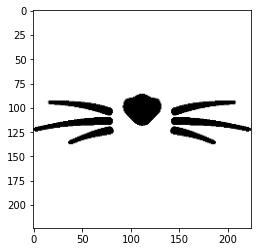

In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 
plt.imshow(img_sticker)
plt.show()

In [13]:
refined_x = x - w // 2
refined_y = y 
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (105,445)


In [14]:
# refined_x, refined_y값에서 왕관 이미지가 시작
refined_x = x - w // 2
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (105,221)


In [15]:
# 스티커를 적용할 영역
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 스티커를 적용 - 스티커의 이미지를 기준으로 값이 255(검은색)인 경우 스티커 적용 아니면 원본 사진 적용
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

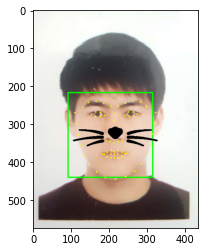

In [16]:
# 고양이 수염을 적용한 이미지를 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

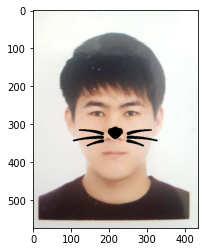

In [17]:
# 수염 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 원본 이미지
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

### (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.
- 찾아본 결과 opencv의 cv2.addWeighted()는 크기가 같은 두 이미지를 합성할 때 쓰입니다.
- cv2.addWeighted를 활용할 때 alpha 값의 조절을 통해 투명도를 조절할 수 있습니다.

In [18]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
alpha = 0.5
result = cv2.addWeighted(sticker_area, alpha, img_sticker, (1- alpha), 0)

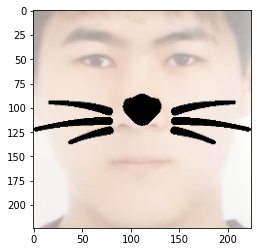

In [19]:
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()

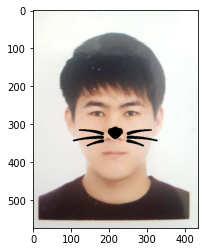

In [20]:
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,result,sticker_area).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

문제점 1. 다른 각도(기울어진 상태의 사진을 활용할 경우 아래 결과 처럼 수염이 제대로 적용되지 않은 것을 확인할 수 있었습니다.

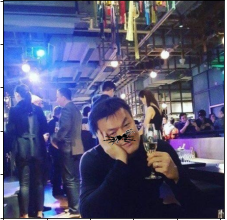

- 이러한 현상을 해결하기 위해서 우선 필터를 기울어진 얼굴에 맞게 cv2.getRotationMatrix2D를 활용해서 기울어질 수 있도록 구현해 보았습니다. 그리고 적용을 하기 위해서 해당 사진의 랜드마크를 확인해 보았는데 랜드마크는 이상하게 기울어진 얼굴이 아닌 정상적인 얼굴의 형태처럼 나오는 것을 확인할 수 있었습니다. 기울어진 얼굴에서 랜드마크를 제대로 찍을 수 있도록 다른 방법을 찾아볼 예정입니다.

문제점 2. 이번 고양이 수염은 가운데 코, 왼쪽 수염, 오른쪽 수염이 하나의 세트입니다. 이를 한꺼번에 적용하려고 하다보니 사진마다 조금씩 오차가 발생하는 것을 확인할 수 있었습니다.

- 이를 해결하기 위해서 제가 생각한 방안은 스티커의 코, 왼쪽 수염, 오른쪽 수염을 3개의 이미지로 분할하고 각각 스티커화해서 코는 코의 위치에 왼쪽 수염은 왼쪽 입 부근에, 오른쪽 수염은 오른쪽 입 부근에 자리할 수 있도록 구현할 예정입니다.

## 프로젝트 결과 및 회고
- 이번 프로젝트는 사람의 얼굴 사진에 스티커를 부착하는 프로젝트입니다. np.where, cv2.addWeighted등을 활용하여 스티커를 합성하는데 성공하였습니다. 결과만 보면 몇 가지의 이미지를 테스트해보니 제가 원하는 위치에 고양이 수염 스티커가 자리잡은 것을 확인할 수 있었습니다.
- 하지만 문제점1, 문제점2 처럼 다른 사례에 대해 고민해보니 제가 만든 스티커 사진은 문제를 가지고 있는 것을 확인할 수 있었습니다.
- 이를 해결하기 위해 주말을 통해 기울어진 사진의 랜드마크를 제대로 찾는 방법과 스티커 이미지를 분할해서 좀 더 정확한 위치에 스티커가 자리잡을 수 있도록 할 예정입니다.
- 컴퓨터 비전은 예전에 접한 경험이 있어 비교적 친숙한 느낌을 받았습니다. 시각적으로 결과를 즉각적으로 확인하고 수정할 수 있어서 흥미를 좀 더 느낄 수 있었습니다.